In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
credits_df = pd.read_csv('dataset/credits.csv')
titles_df = pd.read_csv('dataset/titles.csv')

In [23]:
# This cell checks all the movies/shows that are not in the credits_csv file
credits_movie_ids = set(credits_df['id'])
titles_movie_ids = set(titles_df['id'])

# Find movie ids that are in titles but not in credits
movies_not_in_credits = titles_df[~titles_df['id'].isin(credits_movie_ids)]
movies_not_in_credits

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600000,NaN
145,ts251477,My First Errand,SHOW,“Hajimete no Otsukai” (First Errand) is a Japa...,1991,TV-G,18,"['documentation', 'family', 'reality']",['JP'],12.0,NaN,NaN,NaN,7.730000,7.8
249,tm997728,Blade Runner: The Final Cut,MOVIE,"Visually spectacular, intensely action-packed ...",2007,R,117,"['action', 'thriller', 'scifi']",['US'],NaN,NaN,NaN,NaN,0.055091,9.0
332,ts33559,Shaun the Sheep,SHOW,Shaun the Sheep thinks and acts like a person ...,2007,TV-G,7,"['animation', 'comedy', 'family', 'european']",['GB'],6.0,tt0983983,8.1,28.0,31.375000,7.9
360,ts98340,Metallica: Some Kind of Monster,SHOW,This collection includes the acclaimed rock do...,2004,TV-MA,84,['western'],"['CA', 'US']",1.0,tt6954486,NaN,NaN,0.893000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,tm1066324,Super Monsters: Once Upon a Rhyme,MOVIE,The Super Monsters rethink exemplary fantasies...,2021,NaN,25,"['animation', 'family']",[],NaN,tt14586752,5.6,38.0,53.762000,6.3
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],['US'],NaN,NaN,NaN,NaN,NaN,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296000,10.0


In [24]:
# Group by movie id and aggregate the data into lists
grouped_credits_df = credits_df.groupby('id').agg({
    'person_id': lambda x: list(x),
    'name': lambda x: list(x),
    'character': lambda x: list(x),
    'role': lambda x: list(x)
}).reset_index()

# Separate actors and directors into new columns
grouped_credits_df['actor'] = [[name for name, role in zip(names, roles) if role == 'ACTOR'] for names, roles in zip(grouped_credits_df['name'], grouped_credits_df['role'])]
grouped_credits_df['director'] = [[name for name, role in zip(names, roles) if role == 'DIRECTOR'] for names, roles in zip(grouped_credits_df['name'], grouped_credits_df['role'])]

# Drop unnecessary columns
grouped_credits_df.drop(['name', 'role'], axis=1, inplace=True)
grouped_credits_df


,id,person_id,character,actor,director
0,tm1000037,"[251702, 41192, 589580, 191901, 237433, 76618,...","[Maxi, Karl, Alex, Ante, Jitka, Pankraz, Didie...","[Luna Wedler, Jannis Niewöhner, Milan Peschel,...",[Christian Schwochow]
1,tm1000147,"[5080, 159223, 35608, 595294, 9714, 60547, 772...","[David Carmichael, Jane, Marlon Veidt, Joseph ...","[Guy Pearce, Matilda Anna Ingrid Lutz, Travis ...",[Andrew Baird]
2,tm100015,"[1675, 2673, 13138, 5130, 13145, 13137, 10712,...","[Gordon Jennings, John Rahway, Jack Welles, Ja...","[Idris Elba, Paul Walker, Matt Dillon, Michael...",[John Luessenhop]
3,tm1000166,"[248002, 1793972, 930514, 1794044, 1793676, 24...","[Himself, Himself, Herself, Herself, Himself, ...","[Glenn Fredly, Marcello Tahitoe, Andien Aisyah...",[Saron Sakina]
4,tm1000185,"[1562688, 299215, 106368, 254540, 97525, 20121...","[Monika/Klaudia, Enzo, Ojciec Moniki, Ilona, J...","[Adrianna Chlebicka, Mateusz Banasiuk, Mirosła...",[Filip Zylber]
...,...,...,...,...,...
5484,ts97584,"[1323916, 1324096]","[Himself - Host, nan]",[Sebastian Perry],[William Mitchell]
5485,ts9794,[32954],[Self - Host],[Jerry Seinfeld],[]
5486,ts98252,"[9240, 1950, 9232, 22676, 5664, 8709, 916, 630...","[Skipper (voice), Rico the Penguin (voice), Me...","[Tom McGrath, John DiMaggio, David Schwimmer, ...",[]
5487,ts98316,[4824],[Narrator],[John Hurt],[]


In [25]:
# Merge titles dataframe with grouped credits dataframe
grouped_combined_df = pd.merge(titles_df, grouped_credits_df, left_on = "id", right_on = "id")

# Data cleaning
grouped_combined_df = grouped_combined_df.drop(columns=['imdb_id','tmdb_popularity','tmdb_score','character'], axis=1)
grouped_combined_df.dropna(subset=['title','imdb_score'], inplace=True)
grouped_combined_df['seasons']=grouped_combined_df['seasons'].fillna(0)
grouped_combined_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,person_id,actor,director
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,8.2,808582.0,"[3748, 14658, 7064, 3739, 48933, 32267, 519612...","[Robert De Niro, Jodie Foster, Albert Brooks, ...",[Martin Scorsese]
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.7,107673.0,"[10103, 13020, 6639, 11224, 24509, 80069, 8403...","[Jon Voight, Burt Reynolds, Ned Beatty, Ronny ...",[John Boorman]
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.2,534486.0,"[11472, 1549, 11474, 11473, 11475, 11476, 4089...","[Graham Chapman, John Cleese, Eric Idle, Terry...","[Terry Jones, Terry Gilliam]"
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",0.0,7.7,72662.0,"[35196, 1050, 16868, 14351, 35197, 35200, 1061...","[Lee Marvin, Ernest Borgnine, Charles Bronson,...",[Robert Aldrich]
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,8.8,73424.0,"[11472, 11476, 11475, 11474, 11473]","[Graham Chapman, Michael Palin, Terry Jones, E...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,NaN,102,['comedy'],['MY'],0.0,7.0,66.0,"[1885807, 284159, 141343, 165815, 39469]","[Ai Leng Ong, Chew Kin-Wah, Harith Iskander, E...",[Teddy Chan]
5485,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,"['comedy', 'romance']",['PH'],0.0,7.1,50.0,"[757428, 757395, 134442, 143411, 206514, 26073...","[Maymay Entrata, Edward Barber, Snooky Serna, ...",[Barry Gonzalez]
5486,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,"['romance', 'comedy', 'drama']",['EG'],0.0,5.0,327.0,"[247928, 710979, 1813868, 817494, 1459769, 119...","[Ahmed Hatem, Jamila Awad, Mahmoud Al-Bezzawy,...",[Mohamed Bakir]
5487,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],0.0,6.8,45.0,"[269015, 2151684, 361605, 1018894, 618764, 678...","[Richard Mofe-Damijo, Ego Nwosu, Keppy Ekpenyo...",[Seyi Babatope]


In [26]:
# Merge titles dataframe with credits dataframe
combined_df = pd.merge(titles_df, credits_df, left_on = "id", right_on = "id")

# Drop N/A titles and character column
combined_df = combined_df.drop('character', axis=1)
combined_df.dropna(subset=['title','imdb_score','tmdb_score'], inplace=True)
combined_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,736339,Adelaida Buscato,ACTOR
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,399499,Luz Stella Luengas,ACTOR
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,373198,Inés Prieto,ACTOR
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,378132,Isabel Gaona,ACTOR


In [27]:
movies = grouped_combined_df[grouped_combined_df['type'] != 'SHOW']
movies.reset_index(drop=True, inplace=True)
movies

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,person_id,actor,director
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,8.2,808582.0,"[3748, 14658, 7064, 3739, 48933, 32267, 519612...","[Robert De Niro, Jodie Foster, Albert Brooks, ...",[Martin Scorsese]
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.7,107673.0,"[10103, 13020, 6639, 11224, 24509, 80069, 8403...","[Jon Voight, Burt Reynolds, Ned Beatty, Ronny ...",[John Boorman]
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.2,534486.0,"[11472, 1549, 11474, 11473, 11475, 11476, 4089...","[Graham Chapman, John Cleese, Eric Idle, Terry...","[Terry Jones, Terry Gilliam]"
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",0.0,7.7,72662.0,"[35196, 1050, 16868, 14351, 35197, 35200, 1061...","[Lee Marvin, Ernest Borgnine, Charles Bronson,...",[Robert Aldrich]
4,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,8.0,395024.0,"[11472, 1549, 11473, 11474, 11475, 11476, 1147...","[Graham Chapman, John Cleese, Terry Gilliam, E...",[Terry Jones]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,NaN,102,['comedy'],['MY'],0.0,7.0,66.0,"[1885807, 284159, 141343, 165815, 39469]","[Ai Leng Ong, Chew Kin-Wah, Harith Iskander, E...",[Teddy Chan]
3351,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,"['comedy', 'romance']",['PH'],0.0,7.1,50.0,"[757428, 757395, 134442, 143411, 206514, 26073...","[Maymay Entrata, Edward Barber, Snooky Serna, ...",[Barry Gonzalez]
3352,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,"['romance', 'comedy', 'drama']",['EG'],0.0,5.0,327.0,"[247928, 710979, 1813868, 817494, 1459769, 119...","[Ahmed Hatem, Jamila Awad, Mahmoud Al-Bezzawy,...",[Mohamed Bakir]
3353,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],0.0,6.8,45.0,"[269015, 2151684, 361605, 1018894, 618764, 678...","[Richard Mofe-Damijo, Ego Nwosu, Keppy Ekpenyo...",[Seyi Babatope]


In [28]:
shows = grouped_combined_df[grouped_combined_df['type'] != 'MOVIE']
shows.reset_index(drop=True, inplace=True)
shows

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,person_id,actor,director
0,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,8.8,73424.0,"[11472, 11476, 11475, 11474, 11473]","[Graham Chapman, Michael Palin, Terry Jones, E...",[]
1,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,8.1,2151.0,"[11472, 1549, 11474, 11475, 11476, 16383]","[Graham Chapman, John Cleese, Eric Idle, Terry...",[Ian MacNaughton]
2,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,8.9,308824.0,"[32954, 12464, 43320, 12018]","[Jerry Seinfeld, Jason Alexander, Michael Rich...",[]
3,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,6.9,34115.0,"[8464, 63898, 30068, 90786, 90788]","[David Hasselhoff, Edward Mulhare, William Dan...",[]
4,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'comedy', 'fantasy', '...",['GB'],24.0,6.5,5104.0,[1381431],[Rachael Louise Miller],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,ts270616,We Are: The Brooklyn Saints,SHOW,A Brooklyn youth football program and its self...,2021,TV-14,47,"['documentation', 'sport']",['US'],1.0,6.5,162.0,[801018],[],[Rudy Valdez]
1704,ts287729,Alma Matters: Inside the IIT Dream,SHOW,"In a ""nation of middle-class"" the IIT dream in...",2021,TV-MA,49,"['documentation', 'drama']",['IN'],1.0,8.3,2346.0,"[1913337, 1913613, 1913389, 1913487, 1913928, ...","[Shubham Agarwal, Lokesh Deshmukh, Mukul Sanku...","[Pratik Patra, Prashant Raj]"
1705,ts287687,Lava Ka Dhaava,SHOW,Actor Jaaved Jaafferi brings his signature hum...,2021,NaN,30,['reality'],['IO'],1.0,6.1,42.0,"[48009, 104195]","[Javed Jaffrey, Rutledge Wood]",[]
1706,ts319608,The Family That Sings Together: The Camargos,SHOW,"Surrounded by family and friends, Zezé Di Cama...",2021,NaN,39,"['documentation', 'music', 'reality']",['BR'],1.0,5.3,45.0,"[407641, 915969]","[Zezé di Camargo, Wanessa Camargo]",[]


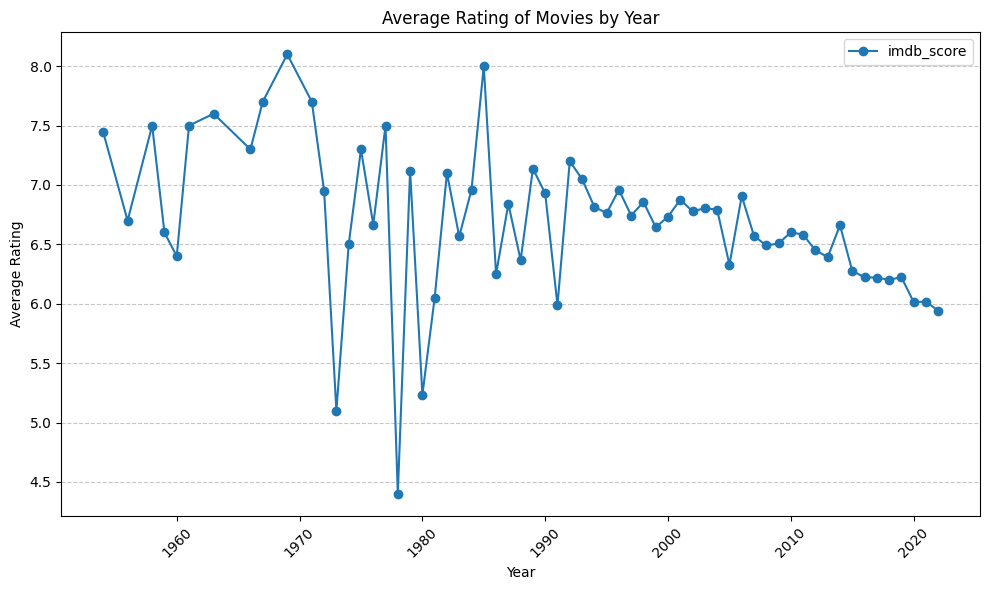

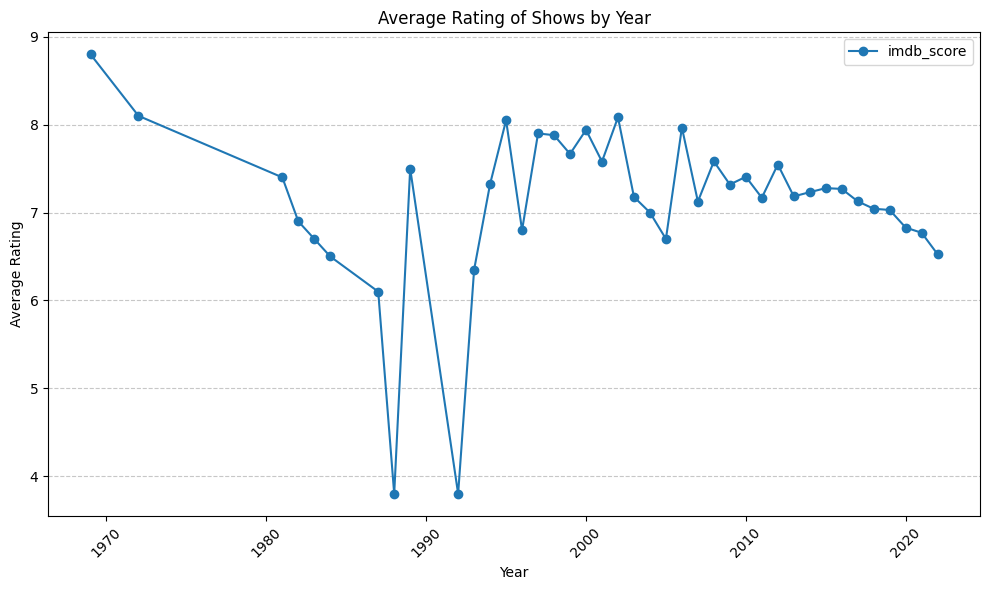

In [29]:
# Rating of movies and shows over time
score_columns = ['imdb_score']
avg_movie_ratings = movies.groupby('release_year')[score_columns].mean()
avg_show_ratings = shows.groupby('release_year')[score_columns].mean()

def plot_avg_rating_by_year(avg_ratings, type):
    plt.figure(figsize=(10, 6))
    
    for column in score_columns:
        plt.plot(avg_ratings.index, avg_ratings[column], marker='o', linestyle='-', label=column)
    
    # Plot line graphs
    plt.title('Average Rating of '+ type +' by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_avg_rating_by_year(avg_movie_ratings, 'Movies')
plot_avg_rating_by_year(avg_show_ratings, 'Shows')


In [30]:
# Locate all the actors that have starred in more than 6 movies/shows
actor_counts=combined_df[combined_df['role']=='ACTOR']['person_id'].value_counts()
actors_more_than_one_movie = actor_counts[actor_counts > 6].index

# Extract all of those actors from the data frame
actors_df=combined_df[(combined_df['person_id'].isin(actors_more_than_one_movie))]
actors_df=actors_df[actors_df['role']=='ACTOR']
actors_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
60,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,11472,Graham Chapman,ACTOR
61,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,1549,John Cleese,ACTOR
62,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,11474,Eric Idle,ACTOR
63,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,11473,Terry Gilliam,ACTOR
64,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,11475,Terry Jones,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77365,tm988613,Madam Chief Minister,MOVIE,A political-drama where a young woman from a s...,2021,NaN,123,['drama'],['IN'],NaN,tt13773882,4.8,1769.0,2.301,6.700,10205,Saurabh Shukla,ACTOR
77366,tm988613,Madam Chief Minister,MOVIE,A political-drama where a young woman from a s...,2021,NaN,123,['drama'],['IN'],NaN,tt13773882,4.8,1769.0,2.301,6.700,233828,Manav Kaul,ACTOR
77367,tm988613,Madam Chief Minister,MOVIE,A political-drama where a young woman from a s...,2021,NaN,123,['drama'],['IN'],NaN,tt13773882,4.8,1769.0,2.301,6.700,176564,Akshay Oberoi,ACTOR
77613,tm878575,The Heartbreak Club,MOVIE,"Coping with heartbreak, the shy owner of floun...",2021,NaN,101,"['comedy', 'drama', 'romance']",['ID'],NaN,tt11841144,6.3,196.0,1.401,8.000,697818,Asri Welas,ACTOR


In [31]:
# Locate all the directors that have directed more than 4 movies/shows
director_counts=combined_df[combined_df['role']=='DIRECTOR']['person_id'].value_counts()
directors_more_than_one_movie = director_counts[director_counts > 4].index

# Extract all of those directors from the data frame
directors_df=combined_df[(combined_df['person_id'].isin(directors_more_than_one_movie))]
directors_df=directors_df[directors_df['role']=='DIRECTOR']
directors_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
36,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3308,Martin Scorsese,DIRECTOR
385,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,"['drama', 'crime', 'comedy']",['EG'],NaN,tt0051390,7.5,4471.0,5.546,7.300,173191,Youssef Chahine,DIRECTOR
425,tm14350,Alexandria… Why?,MOVIE,Set against the panoramic backdrop of war-torn...,1979,NaN,133,['drama'],['EG'],NaN,tt0077751,7.2,1727.0,1.370,6.000,173191,Youssef Chahine,DIRECTOR
440,tm81728,The Land,MOVIE,"Set in 1933, the mayor informs the peasants th...",1969,NaN,129,['drama'],['EG'],NaN,tt0064038,8.1,1958.0,1.265,8.500,173191,Youssef Chahine,DIRECTOR
479,tm27298,Saladin the Victorious,MOVIE,"Saladin, the first sultan of Egypt and Syria, ...",1963,NaN,186,"['action', 'drama', 'war', 'history', 'romance']",['EG'],NaN,tt0057357,7.6,2508.0,4.156,7.100,173191,Youssef Chahine,DIRECTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75978,tm1111595,A California Christmas: City Lights,MOVIE,Follows Callie and Joseph one year after they ...,2021,PG-13,105,"['comedy', 'drama', 'romance']",['US'],NaN,tt13701962,5.5,2231.0,19.813,6.600,127816,Shaun Paul Piccinino,DIRECTOR
76416,tm1124066,Carlos Ballarta: False Prophet,MOVIE,Mexican comic Carlos Ballarta is back and this...,2021,NaN,63,['comedy'],['MX'],NaN,tt15733384,6.7,132.0,3.738,5.200,211560,Raúl Campos,DIRECTOR
76972,tm1130275,Mo Amer: Mohammed in Texas,MOVIE,"In his hometown of Houston, Mo Amer takes on p...",2021,NaN,64,['comedy'],['US'],NaN,tt15845288,6.5,652.0,2.831,4.300,56729,Jay Chapman,DIRECTOR
77286,tm1147041,Chief Daddy 2: Going for Broke,MOVIE,The Beecroft family are ready to spend all of ...,2021,NaN,112,['comedy'],['NG'],NaN,tt16760592,3.0,144.0,74.519,5.700,590029,Niyi Akinmolayan,DIRECTOR


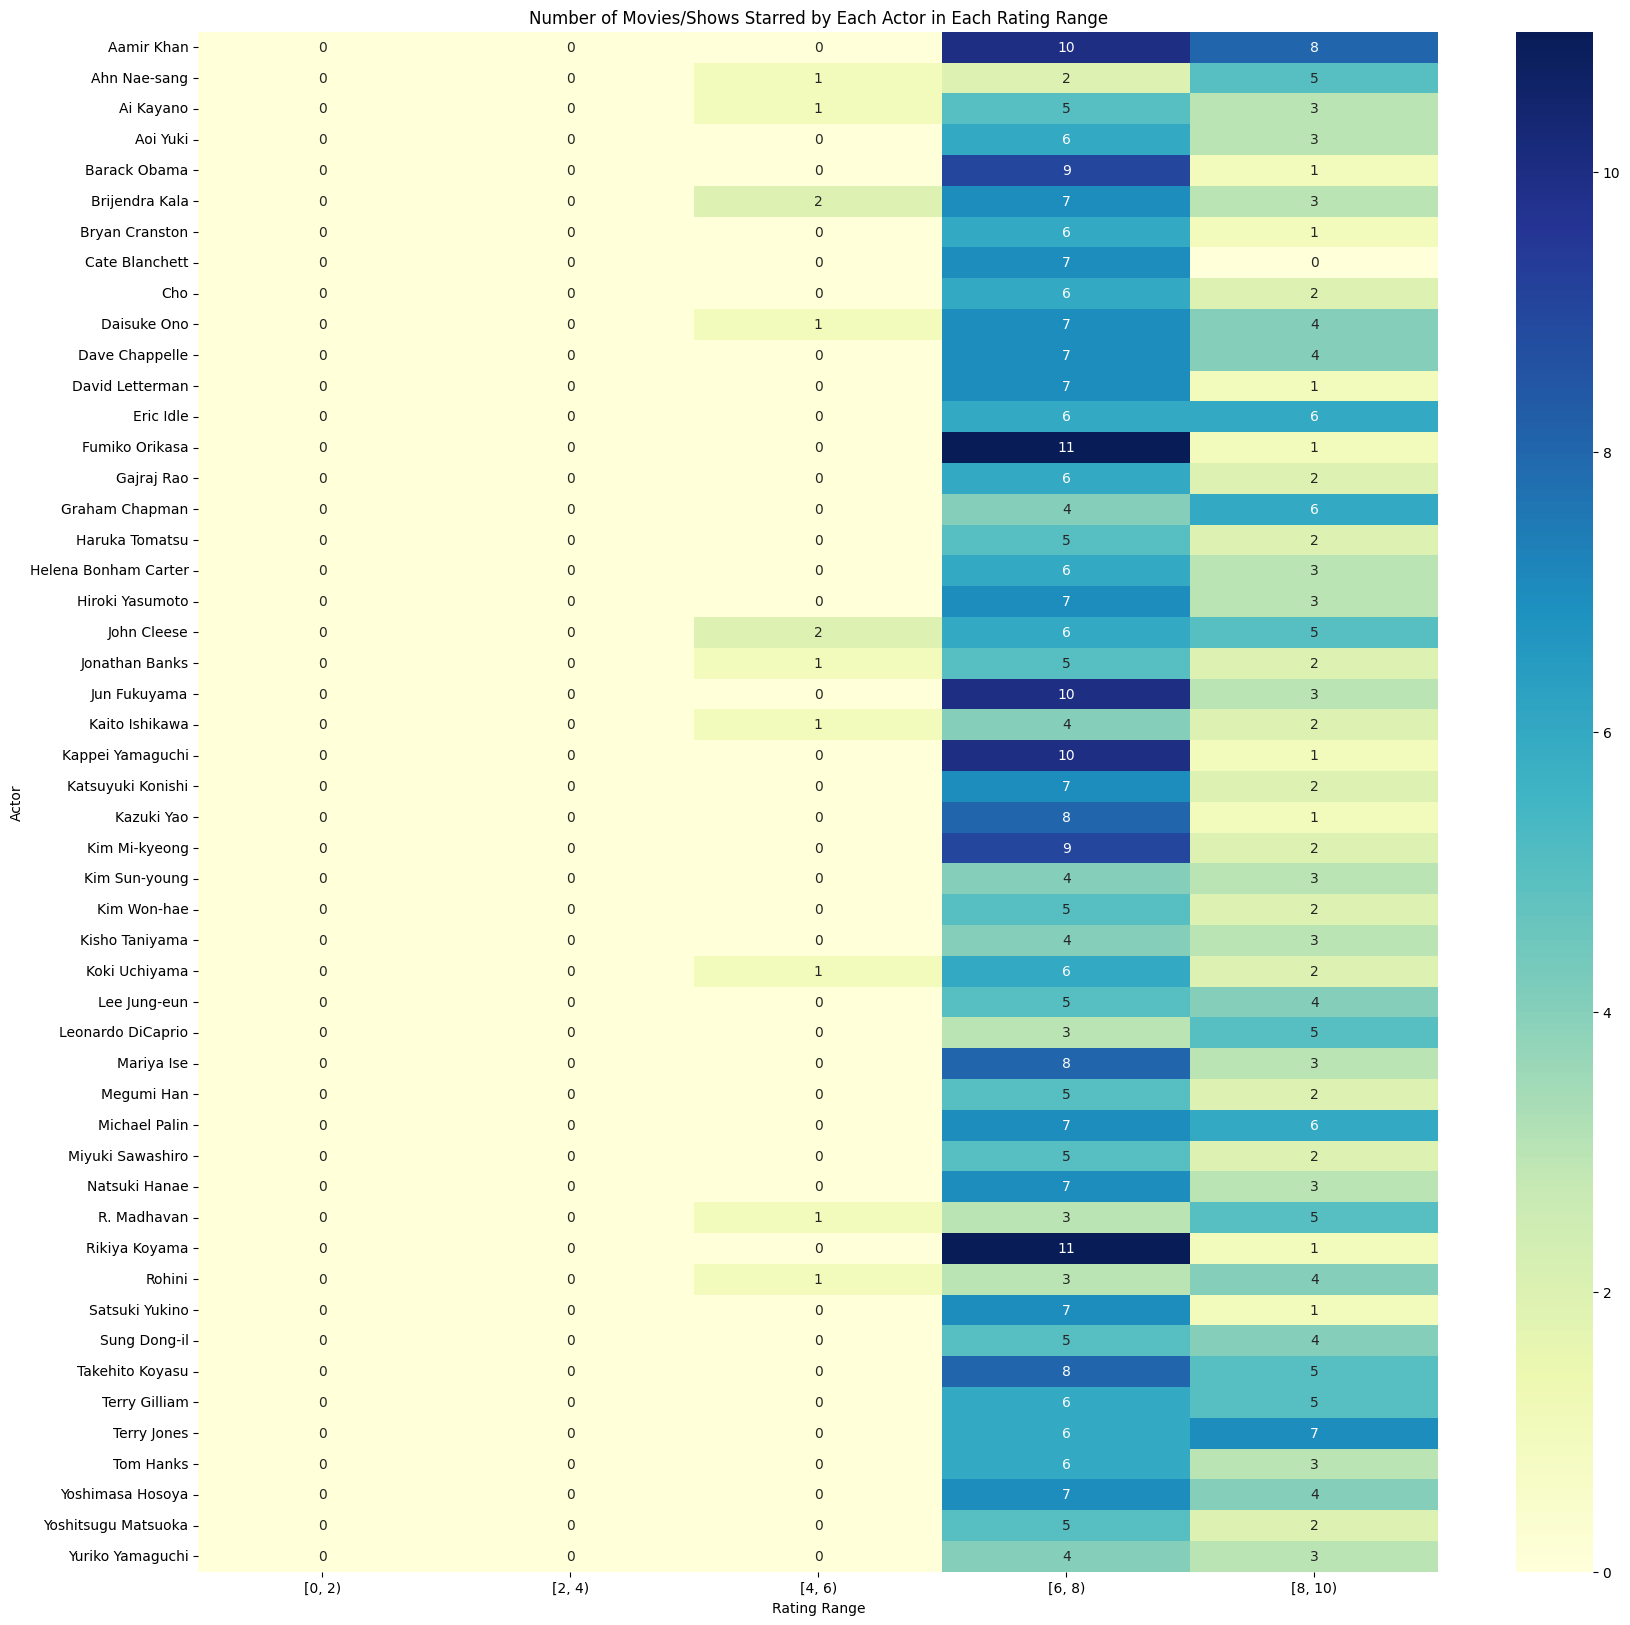

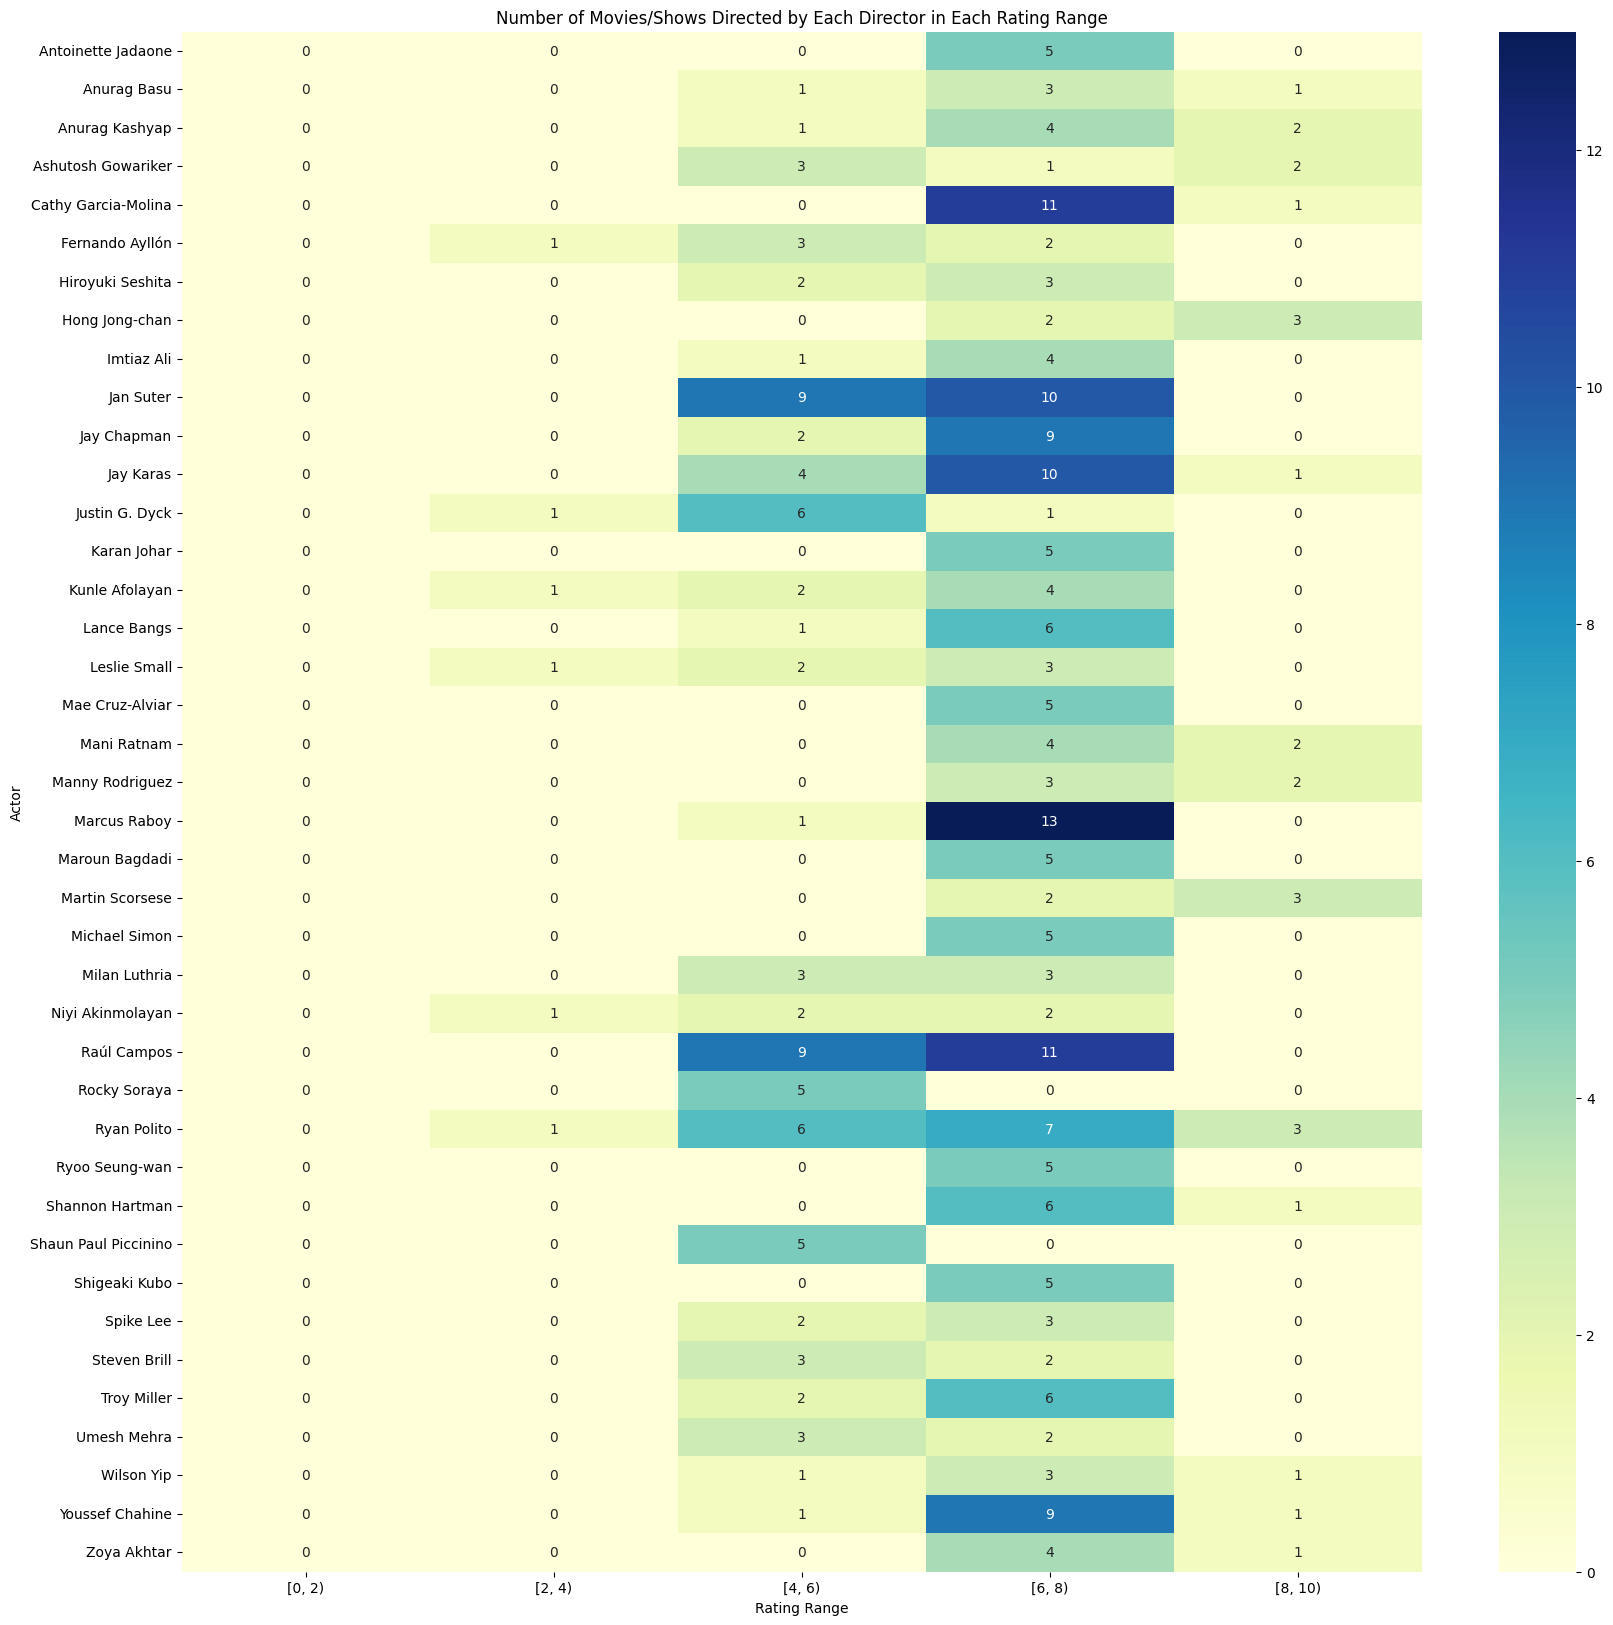

In [32]:
def plot_avg_rating_by_role(role_df, title):
    # Extract the top 50 people with the best performing movies/shows on average 
    person_avg_scores=role_df.groupby('name')['imdb_score'].mean().reset_index()
    topPeople=person_avg_scores.sort_values(by='imdb_score', ascending=False)
    topPeople=topPeople.head(50)

    # Define the rating ranges
    rating_ranges = [0, 2, 4, 6, 8, 10]

    new_role_df = role_df[role_df['name'].isin(topPeople['name'])].copy()

    # Bin the ratings into the specified ranges
    new_role_df.loc[:, 'rating_range'] = pd.cut(new_role_df['imdb_score'], bins=rating_ranges, right=False)

    # Pivot the DataFrame to count movies played by each actor falling within each rating range
    heatmap_data = new_role_df.groupby(['name', 'rating_range'], observed=False).size().unstack(fill_value=0)

    # Plot heatmaps
    plt.figure(figsize=(20, 20))
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
    plt.title(title)
    plt.xlabel('Rating Range')
    plt.ylabel('Actor')
    plt.show()

plot_avg_rating_by_role(actors_df, 'Number of Movies/Shows Starred by Each Actor in Each Rating Range')
plot_avg_rating_by_role(directors_df, 'Number of Movies/Shows Directed by Each Director in Each Rating Range')

TODO: Average score by genre

TODO: Sort Actors by score


Average IMDB score by genre (MOVIES)



/tmp/ipykernel_10881/2718996849.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_scores_df['Genre'], y=average_scores_df['Average IMDb Score'], palette='viridis')


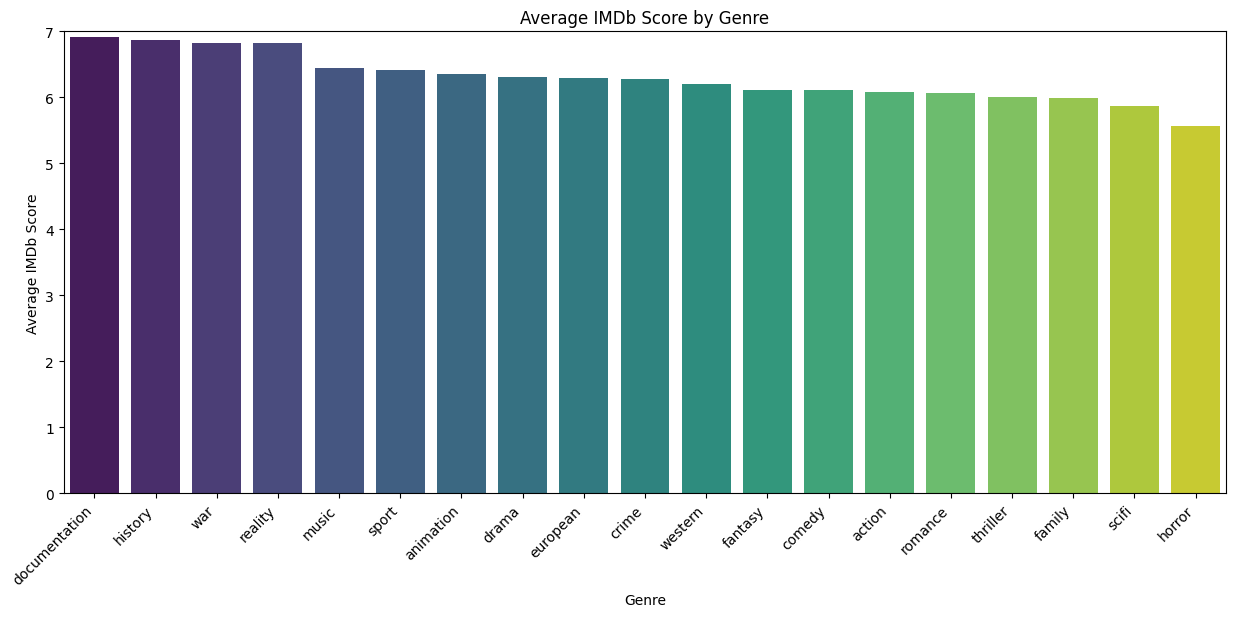

/tmp/ipykernel_10881/2718996849.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


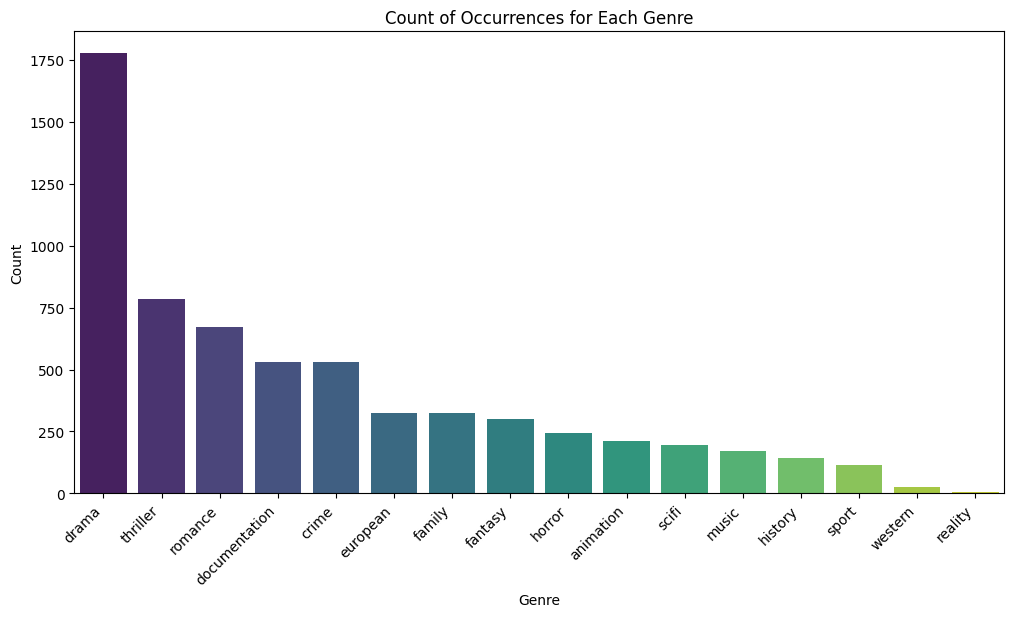

In [33]:
movies_genres_df = movies.copy().reset_index()

# Initialize an empty list to store all genres
genres_list = []

# Use ast.literal_eval to store all genres into a list
for x in movies_genres_df['genres']:
    y = ast.literal_eval(x)
    genres_list.extend(y)

# Remove duplicates
genres_set = list(set(genres_list))

# Create a DataFrame of genres with binary values (0 or 1)
genres_df = movies_genres_df['genres'].apply(lambda x: pd.Series([1 if genre in ast.literal_eval(x) else 0 for genre in genres_set], index=genres_set))

# Concatenate the new DataFrame with the original one
movies_genres_df = pd.concat([movies_genres_df, genres_df], axis=1)

# Drop NaN values in 'imdb_score' column
movies_genres_df = movies_genres_df.dropna(subset=['imdb_score'])

# Drop the 'genres' column
movies_genres_df = movies_genres_df.drop('genres', axis=1)

# Drop duplicates based on the 'id' column
movies_genres_df = movies_genres_df.drop_duplicates(subset='id')
movies_genres_df.reset_index(drop=True, inplace=True)

# Calculate the average IMDb score for each genre
average_scores_by_genre = {}
for genre in genres_set:
    genre_columns = [col for col in movies_genres_df.columns if genre in col]
    average_scores_by_genre[genre] = movies_genres_df[movies_genres_df[genre_columns].any(axis=1)]['imdb_score'].mean()

# Convert the result into a DataFrame
average_scores_df = pd.DataFrame(list(average_scores_by_genre.items()), columns=['Genre', 'Average IMDb Score'])

# Sort genres by average score in descending order
average_scores_df = average_scores_df.sort_values(by='Average IMDb Score', ascending=False)


# Plotting Average Scores
plt.figure(figsize=(15, 6))
sns.barplot(x=average_scores_df['Genre'], y=average_scores_df['Average IMDb Score'], palette='viridis')
plt.title('Average IMDb Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Score')
plt.ylim(0,7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

genre_counts = movies_genres_df.iloc[:, 18:].sum()
genre_counts = genre_counts.sort_values(ascending=False)

# Plotting the count of occurrences for each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Count of Occurrences for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [34]:
movies_genres_df

,index,id,title,type,description,release_year,age_certification,runtime,production_countries,seasons,...,western,animation,european,fantasy,romance,drama,history,horror,documentation,family
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,['US'],0.0,...,0,0,0,0,0,1,0,0,0,0
1,1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,['US'],0.0,...,0,0,1,0,0,1,0,0,0,0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,['GB'],0.0,...,0,0,0,1,0,0,0,0,0,0
3,3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['GB', 'US']",0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['GB'],0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,3350,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,NaN,102,['MY'],0.0,...,0,0,0,0,0,0,0,0,0,0
3351,3351,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,['PH'],0.0,...,0,0,0,0,1,0,0,0,0,0
3352,3352,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,['EG'],0.0,...,0,0,0,0,1,1,0,0,0,0
3353,3353,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,['NG'],0.0,...,0,0,0,0,1,1,0,0,0,0


Genres vs iMDB popularity (MOVIES)



{'crime': 27690209.0, 'drama': 61105475.0, 'thriller': 43440824.0, 'european': 12057666.0, 'fantasy': 11365045.0, 'romance': 15364879.0, 'western': 3260946.0, 'documentation': 2954786.0, 'history': 5911254.0, 'music': 3649459.0, 'family': 5035756.0, 'horror': 9584488.0, 'scifi': 13258911.0, 'animation': 3490624.0, 'sport': 2317001.0, 'reality': 72778.0}


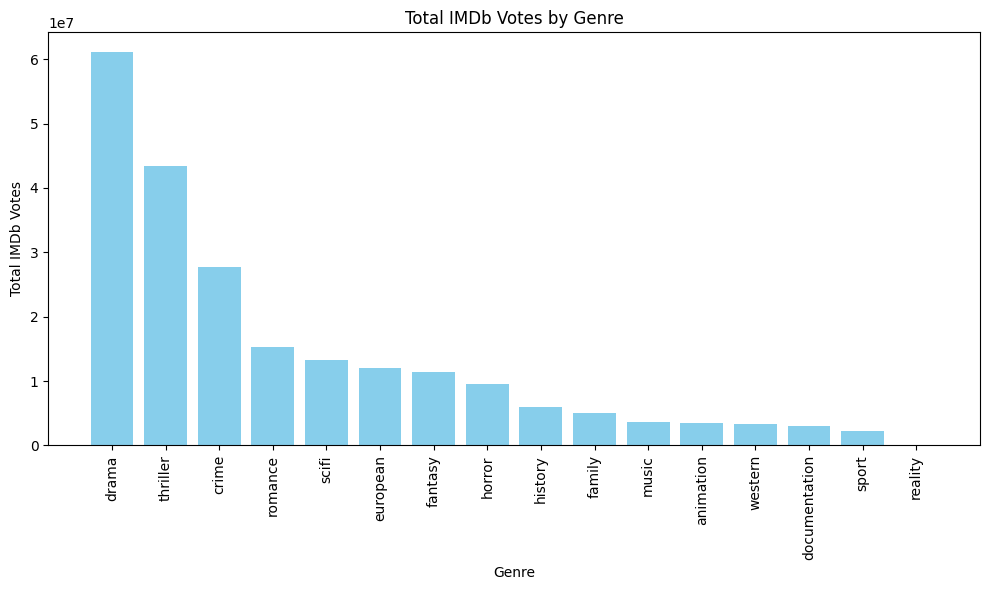

In [35]:
votes = {}

# Drop rows with missing values in the 'imdb_votes' column
cleaned_movies_df = movies_genres_df.dropna(subset=['imdb_votes'])

# Iterate over the index and values of the cleaned DataFrame
for index, row in cleaned_movies_df.iterrows():
    for genre in row.index[18:]:
        if row[genre] == 1:
            # Add the IMDb votes to the total for that genre
            votes[genre] = votes.get(genre, 0) + row['imdb_votes']

# Display the genre votes
print(votes)

# Convert the votes dictionary to a DataFrame for easier plotting
genre_votes_df = pd.DataFrame(list(votes.items()), columns=['Genre', 'Total Votes'])

# Sort the genre votes in descending order
genre_votes_df = genre_votes_df.sort_values(by='Total Votes', ascending=False)
genre_votes_df

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genre_votes_df['Genre'], genre_votes_df['Total Votes'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Total IMDb Votes')
plt.title('Total IMDb Votes by Genre')
plt.xticks(rotation=90)  # Rotate genre labels for better readability
plt.tight_layout()
plt.show()

Count number of movies that are in each genre



In [36]:
movies_genres_df

num_genres = {}

for index, row in movies_genres_df.iterrows():
    for genre in row.index[18:]:
        if row[genre] == 1:
            num_genres[genre] = num_genres.get(genre, 0) + 1

num_genres
num_genres_df = pd.DataFrame(list(num_genres.items()), columns=['Genre', 'Number of Movies'])
num_genres_df = num_genres_df.sort_values(by='Number of Movies', ascending=False)
num_genres_df

,Genre,Number of Movies
1,drama,1776
2,thriller,786
5,romance,673
7,documentation,530
0,crime,529
3,european,326
10,family,324
4,fantasy,300
11,horror,245
13,animation,212
